# Importing needed Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import squarify
import warnings
warnings.filterwarnings('ignore')

**Reading data and about the data**

In [40]:
my_data=pd.read_csv('/home/saumitra/Desktop/kaggle/train.tsv',delimiter='\t',dtype={'item_description':str})

In [41]:
my_data.shape

(1482535, 8)

In [42]:
my_data.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [43]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


**checking the total null values in each category**

In [44]:
my_data.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [45]:
my_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


# Top 10 categories by number of product

Text(0.5, 0, 'count')

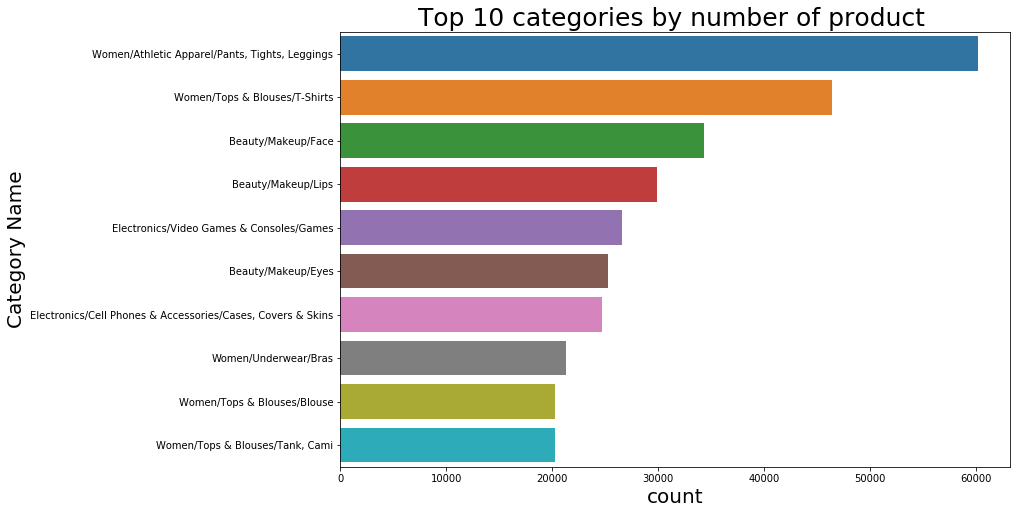

In [46]:
new_data=my_data.category_name.value_counts().iloc[:10]
plt.subplots(figsize=(12,8))
sns.barplot(y=new_data.index,x=new_data)
plt.title('Top 10 categories by number of product ',fontsize=25)
plt.ylabel('Category Name',fontsize=20)
plt.xlabel('count',fontsize=20)

**stacking category_name,size and price**

In [47]:
category_size=pd.DataFrame(my_data.category_name.value_counts())
category_size.reset_index(level=0,inplace=True)
category_size.sort_values('category_name',ascending=False,inplace=True)
category_size.columns=('category_name','Size')
category_size.head()

,category_name,Size
0,"Women/Athletic Apparel/Pants, Tights, Leggings",60177
1,Women/Tops & Blouses/T-Shirts,46380
2,Beauty/Makeup/Face,34335
3,Beauty/Makeup/Lips,29910
4,Electronics/Video Games & Consoles/Games,26557


In [48]:
group=my_data.groupby(my_data.category_name)
mean_price=group.price.mean()
mean_price=pd.DataFrame(mean_price)
mean_price.reset_index(level=0,inplace=True)
mean_price.head()

,category_name,price
0,Beauty/Bath & Body/Bath,18.481878
1,Beauty/Bath & Body/Bathing Accessories,21.882530
2,Beauty/Bath & Body/Cleansers,13.564315
3,Beauty/Bath & Body/Other,20.469388
4,Beauty/Bath & Body/Scrubs & Body Treatments,24.640394


In [49]:
category_size=pd.merge(category_size,mean_price,how='left',on='category_name')
category_size.head()

,category_name,Size,price
0,"Women/Athletic Apparel/Pants, Tights, Leggings",60177,34.392733
1,Women/Tops & Blouses/T-Shirts,46380,19.386125
2,Beauty/Makeup/Face,34335,18.470890
3,Beauty/Makeup/Lips,29910,18.520846
4,Electronics/Video Games & Consoles/Games,26557,24.119667


# Top 25 categories by their price

Text(0.5, 0, 'Price of Category')

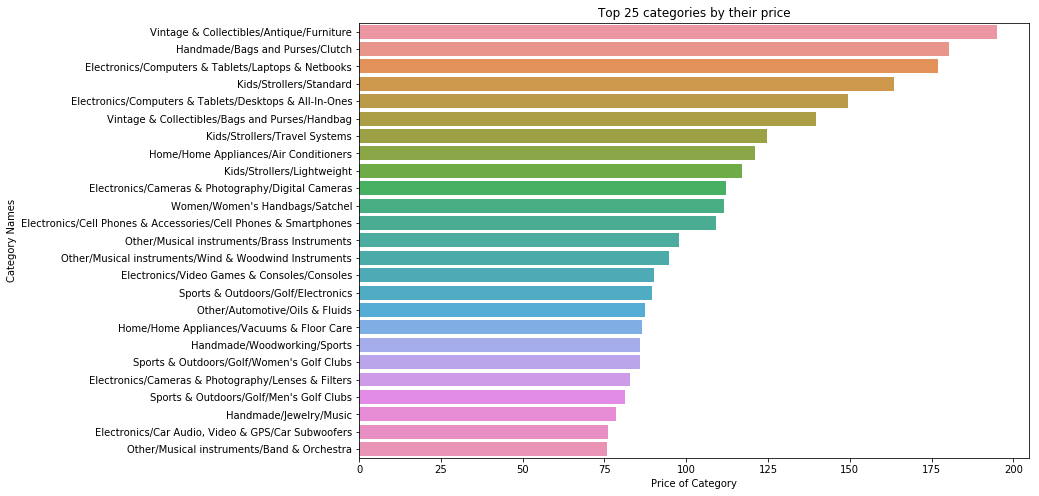

In [50]:
group=my_data.groupby(my_data.category_name)
mean_price=pd.DataFrame(group.price.mean())
mean_price.sort_values('price',ascending=False,inplace=True)
mean_price.reset_index(inplace=True)
mean_price=mean_price.head(25)

plt.subplots(figsize=(12,8))
sns.barplot(y=mean_price.category_name,x=mean_price.price)
plt.title('Top 25 categories by their price')
plt.ylabel('Category Names')
plt.xlabel('Price of Category')

# Mean Price of each category

Text(0.5, 0, 'Mean price of each category')

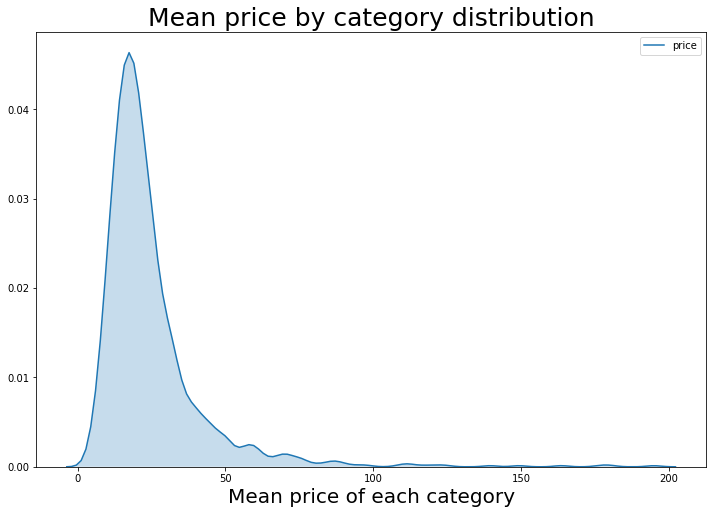

In [51]:
mean_price_1=pd.DataFrame(group.price.mean())
mean_price_1.reset_index(level=0,inplace=True)

plt.subplots(figsize=(12,8))
sns.kdeplot(mean_price_1.price,shade=True)
plt.title('Mean price by category distribution',fontsize=25)
plt.xlabel('Mean price of each category',fontsize=20)

# Splitting Categories

In [52]:
my_data['cat1']=my_data.category_name.str.extract('([^/]+)/[^/]+/[^/]+')
my_data['cat2']=my_data.category_name.str.extract('([^/]+/[^/]+)/[^/]+')

In [53]:
my_data[['cat1','cat2','category_name']].head()

,cat1,cat2,category_name
0,Men,Men/Tops,Men/Tops/T-shirts
1,Electronics,Electronics/Computers & Tablets,Electronics/Computers & Tablets/Components & P...
2,Women,Women/Tops & Blouses,Women/Tops & Blouses/Blouse
3,Home,Home/Home Décor,Home/Home Décor/Home Décor Accents
4,Women,Women/Jewelry,Women/Jewelry/Necklaces


## Visualizing by first category

Text(0, 0.5, '')

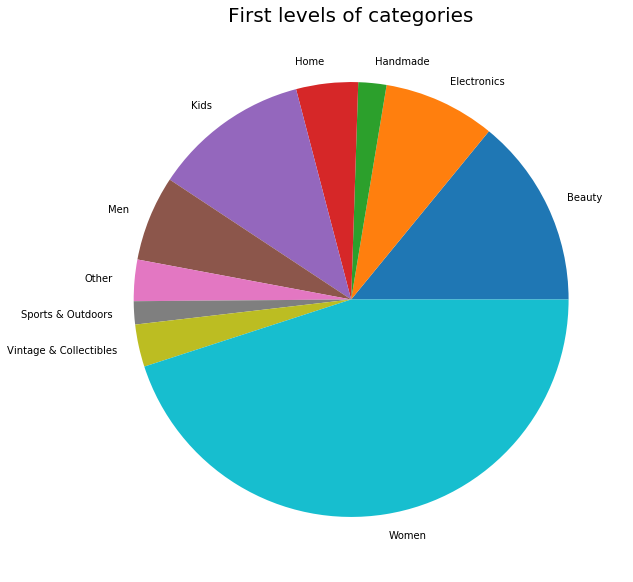

In [54]:
plt.subplots(figsize=(12,10))
new_data=my_data.groupby(my_data.cat1)
new_data.name.count().plot.pie()
plt.title('First levels of categories',fontsize=20)
plt.ylabel('')

## Visualizing by second category

In [55]:
all_data={}
for i in my_data.cat1[my_data.cat1.isnull() == False].unique():
    category=my_data.cat2[my_data.cat1 == i]
    category=pd.DataFrame(category.value_counts().reset_index())
    all_data[i]=category

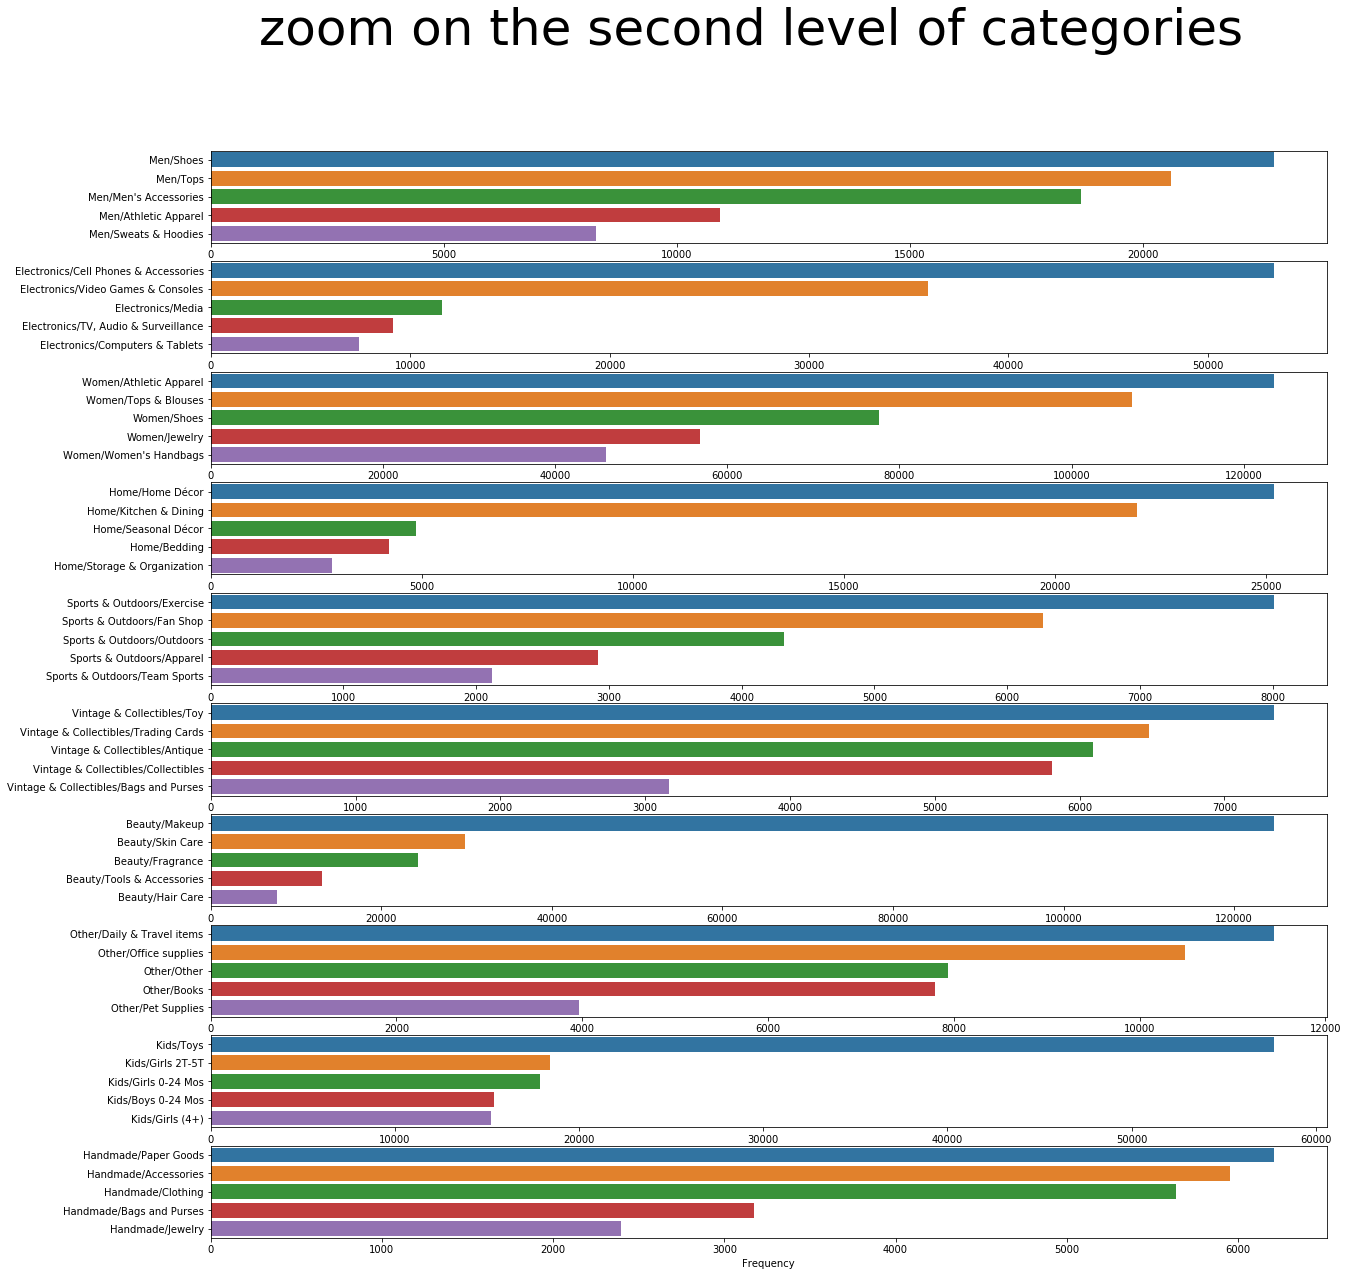

In [56]:
j=0
fig,axis=plt.subplots(10,1,figsize=(20,20))
plt.suptitle('zoom on the second level of categories',fontsize=50)
for val in all_data:
    sns.barplot(x='cat2',y='index',data=all_data[val].iloc[:5],ax=axis.flatten()[j])
    axis.flatten()[j].set_ylabel('')
    axis.flatten()[j].set_xlabel('Frequency')
    j+=1

## Top Prices of First level categories

Text(0.5, 0, 'Price')

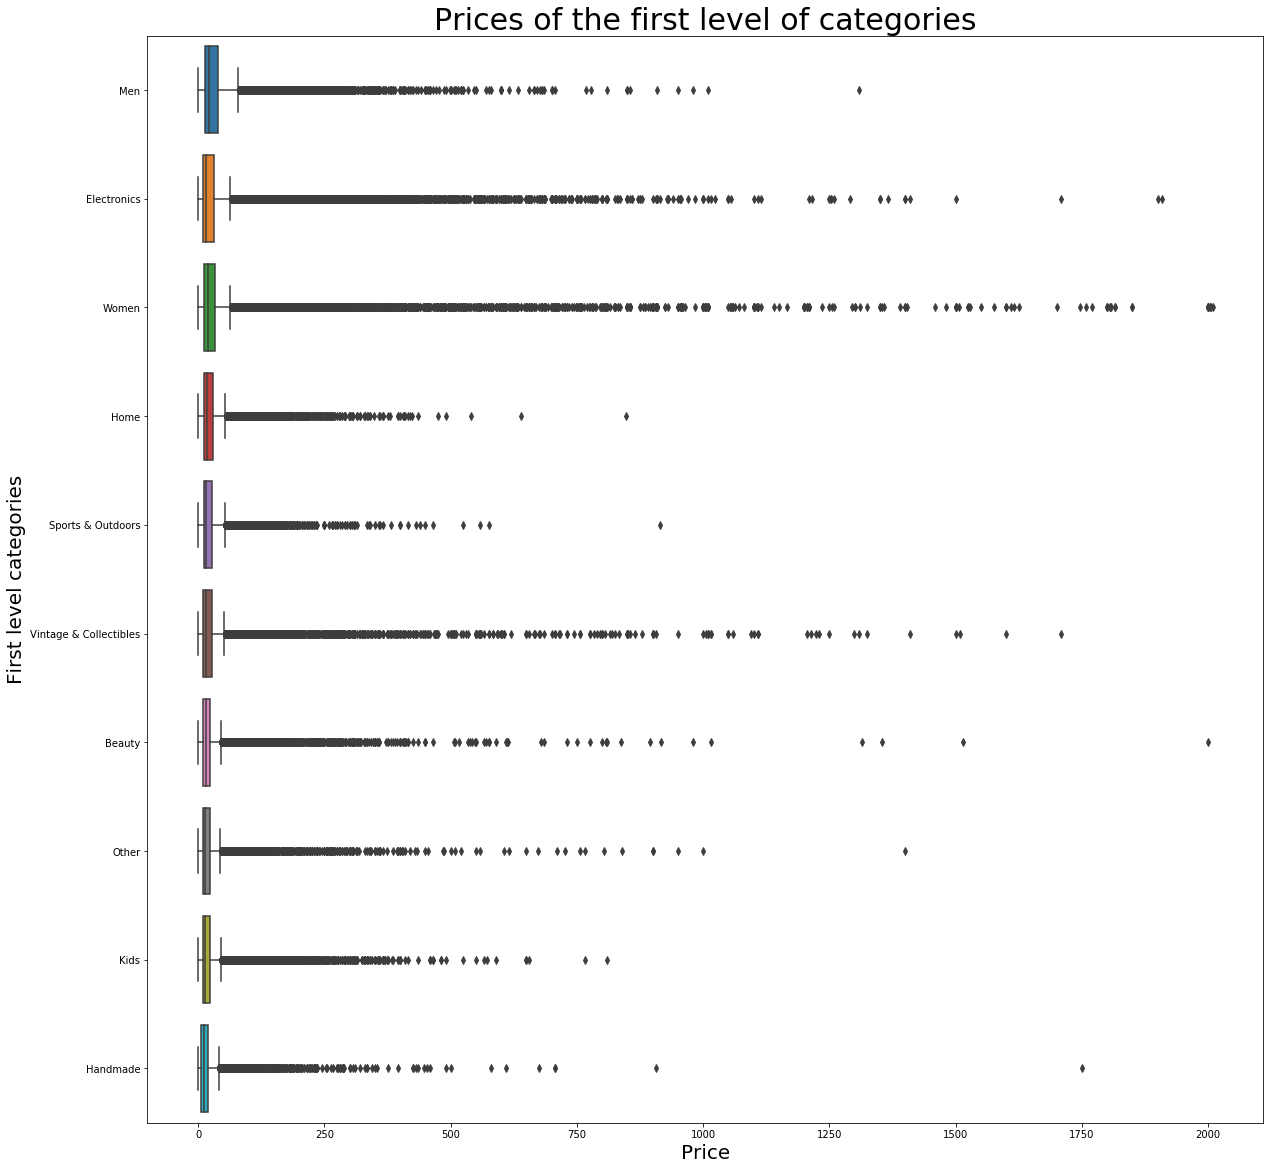

In [57]:
plt.subplots(figsize=(20,20))
sns.boxplot(x=my_data.price,y=my_data.cat1)
plt.title('Prices of the first level of categories', fontsize = 30)
plt.ylabel ('First level categories', fontsize = 20)
plt.xlabel ('Price', fontsize = 20)

## Top prices of second level categories

In [58]:
rank_level_2=pd.DataFrame(my_data.groupby('cat2').mean()).sort_values(by='price',ascending=False)
rank_level_2.head()

,train_id,item_condition_id,price,shipping
cat2,,,,
Electronics/Computers & Tablets,748908.408523,2.294529,87.887754,0.421562
Vintage & Collectibles/Bags and Purses,744389.945937,2.331015,87.515966,0.374644
Electronics/Cameras & Photography,720470.234658,2.042254,71.343813,0.370724
Kids/Strollers,721610.161426,2.285115,67.280922,0.280922
Men/Shoes,743945.441662,2.395561,61.688350,0.251338


In [59]:
top_20=rank_level_2.head(20).reset_index()
top_20_list=top_20.cat2.unique().tolist()
top_20_full=my_data.loc[my_data.cat2.isin(top_20_list)]

Text(0.5, 0, 'Price')

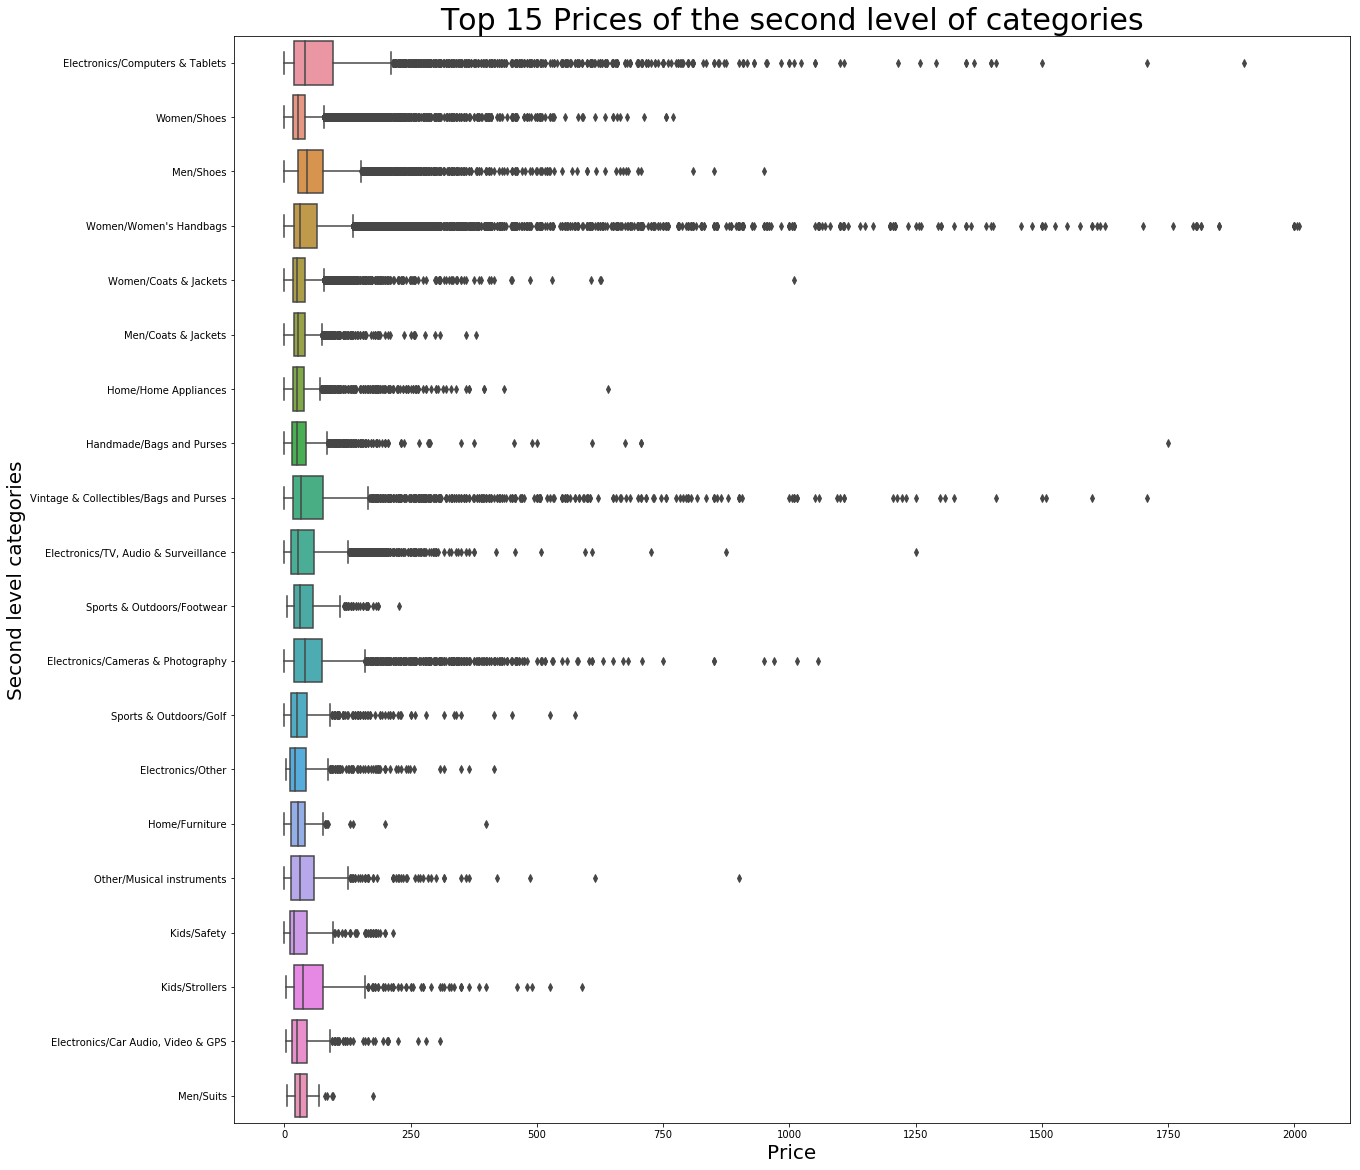

In [60]:
plt.subplots(figsize=(20,20))
sns.boxplot(x=top_20_full.price,y=top_20_full.cat2)
plt.title('Top 15 Prices of the second level of categories', fontsize = 30)
plt.ylabel ('Second level categories', fontsize = 20)
plt.xlabel ('Price', fontsize = 20)

## Bottom prices of second level categories

In [61]:
bottom_20=rank_level_2.tail(20).reset_index()
bottom_20_list=bottom_20.cat2.unique().tolist()
bottom_20_full=my_data.loc[my_data.cat2.isin(bottom_20_list)]

Text(0.5, 0, 'Price')

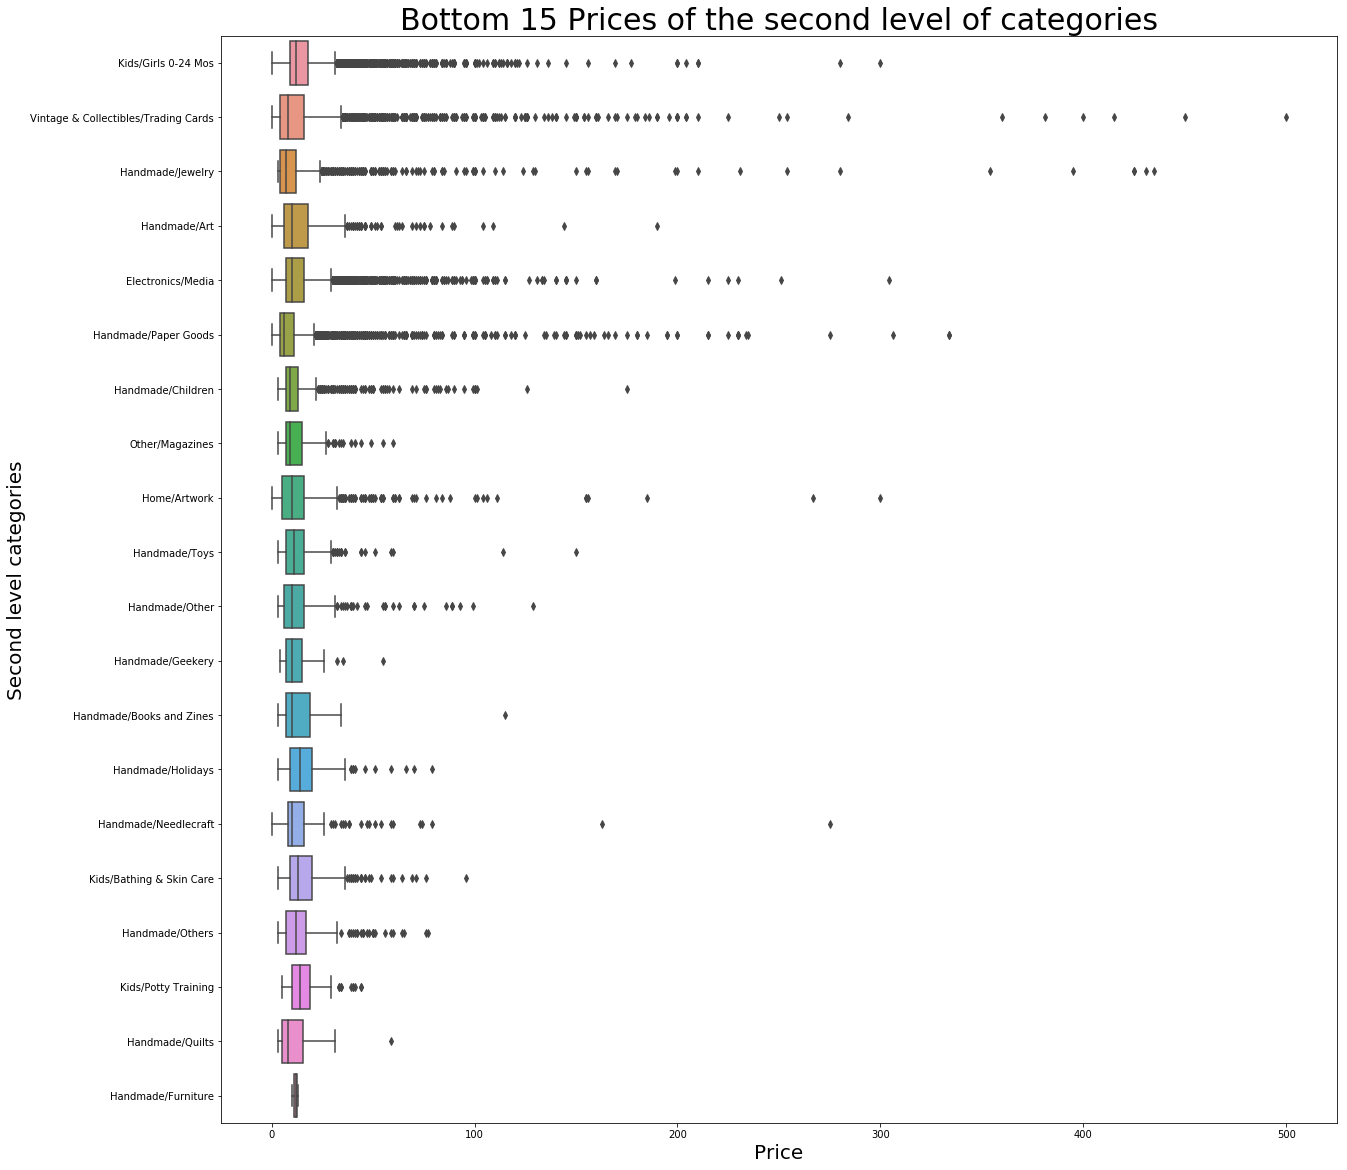

In [62]:
plt.subplots(figsize=(20,20))
sns.boxplot(x=bottom_20_full.price,y=bottom_20_full.cat2)
plt.title('Bottom 15 Prices of the second level of categories', fontsize = 30)
plt.ylabel ('Second level categories', fontsize = 20)
plt.xlabel ('Price', fontsize = 20)

# Setting through Brand names

In [63]:
Brand=pd.DataFrame(my_data.brand_name.value_counts().reset_index()).iloc[:10]

In [64]:
Brand.columns=['brandname','sizes']

In [65]:
Brand

,brandname,sizes
0,PINK,54088
1,Nike,54043
2,Victoria's Secret,48036
3,LuLaRoe,31024
4,Apple,17322
5,FOREVER 21,15186
6,Nintendo,15007
7,Lululemon,14558
8,Michael Kors,13928
9,American Eagle,13254


### Barplot for top 10 most selling brands

Text(0, 0.5, 'Brand Name')

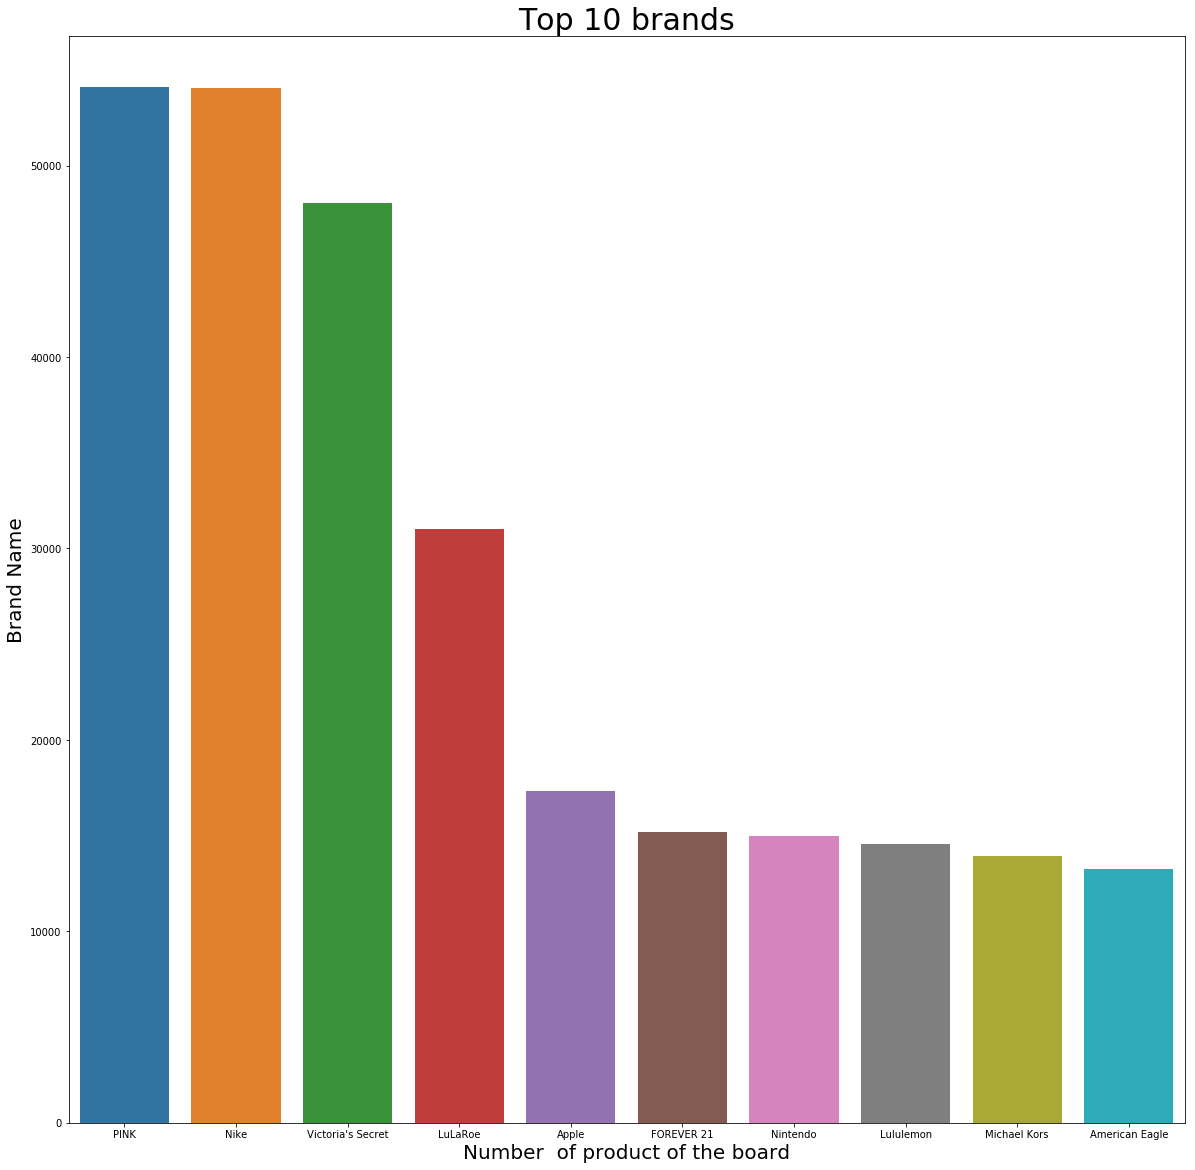

In [66]:
plt.subplots(figsize=(20,20))
sns.barplot(x=Brand.brandname,y=Brand.sizes)
plt.title('Top 10 brands',fontsize=30)
plt.xlabel('Number  of product of the board',fontsize=20)
plt.ylabel('Brand Name',fontsize=20)

## Visualization of Most expensive Brands

In [67]:
group=my_data.groupby(my_data.brand_name)
Expensive_15=pd.DataFrame(group.mean().sort_values(by='price',ascending=False).reset_index()).iloc[:15]

(array([  0., 100., 200., 300., 400., 500.]),
 <a list of 6 Text yticklabel objects>)

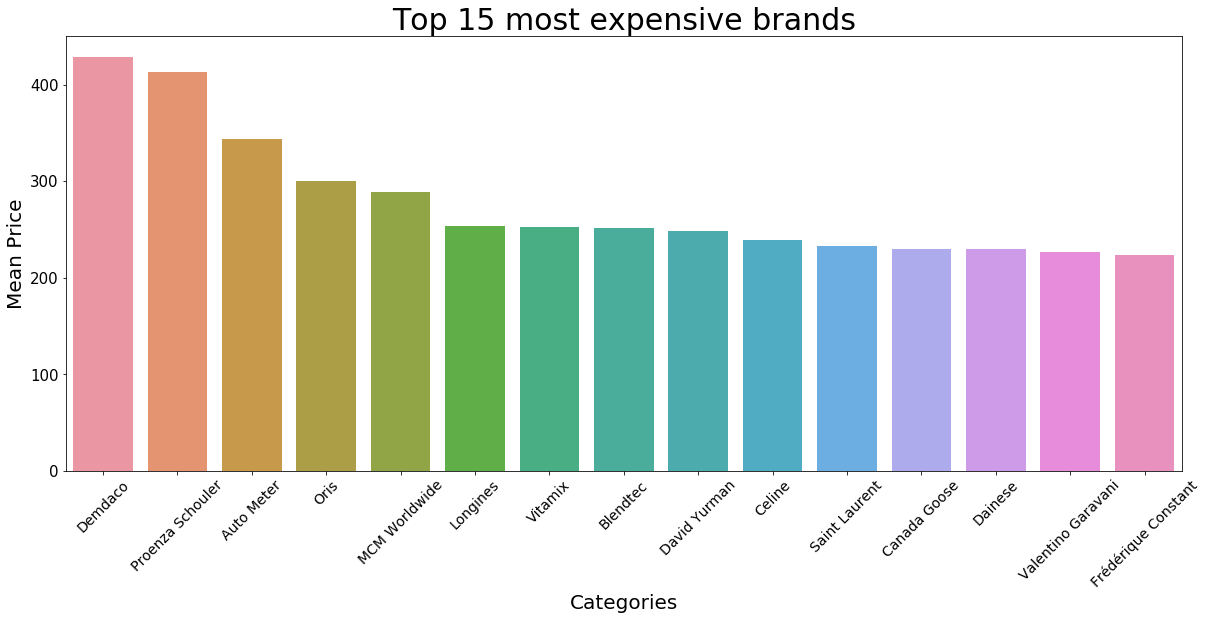

In [68]:
plt.subplots(figsize=(20,8))
sns.barplot(x=Expensive_15.brand_name,y=Expensive_15.price)
plt.title('Top 15 most expensive brands',fontsize=30)
plt.ylabel('Mean Price',fontsize=20)
plt.xlabel('Categories',fontsize=20)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=15)

## KDE plot for price

Text(0.5, 1.0, 'Simple Distribution plot of the price')

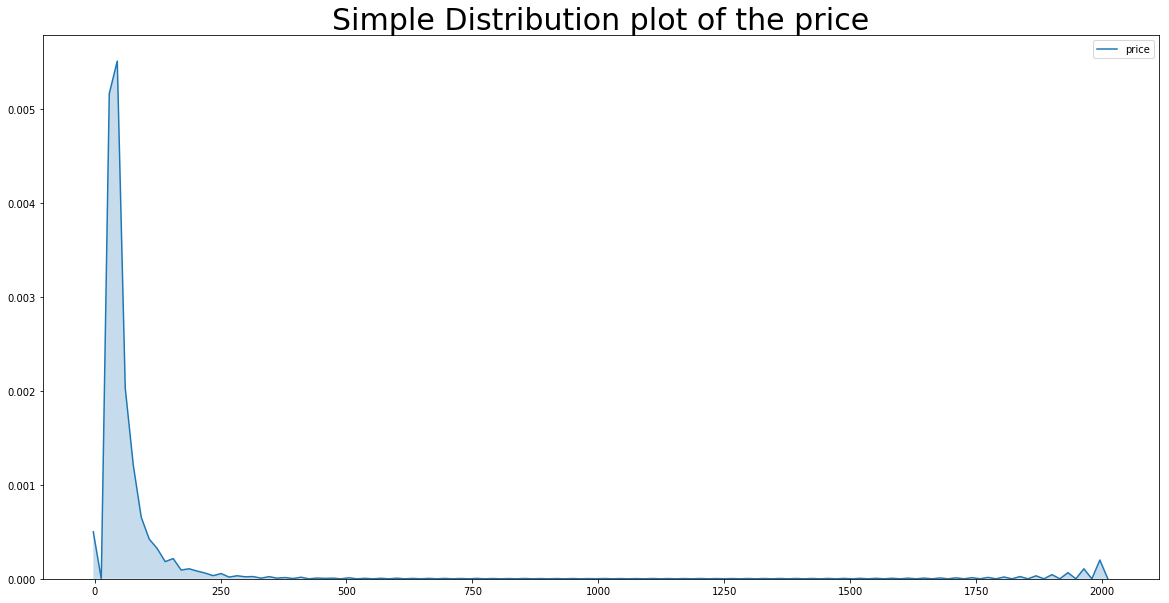

In [69]:
plt.subplots(figsize=(20,10))
sns.kdeplot(data=my_data.price,shade=True)
plt.title('Simple Distribution plot of the price',fontsize=30)

# Categories with item priced Zero

In [70]:
new_data=pd.DataFrame(my_data[my_data.price == 0].category_name.value_counts().sort_values(
    ascending=False).reset_index()).iloc[:15]
new_data.columns=['category_names','category_count']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text yticklabel objects>)

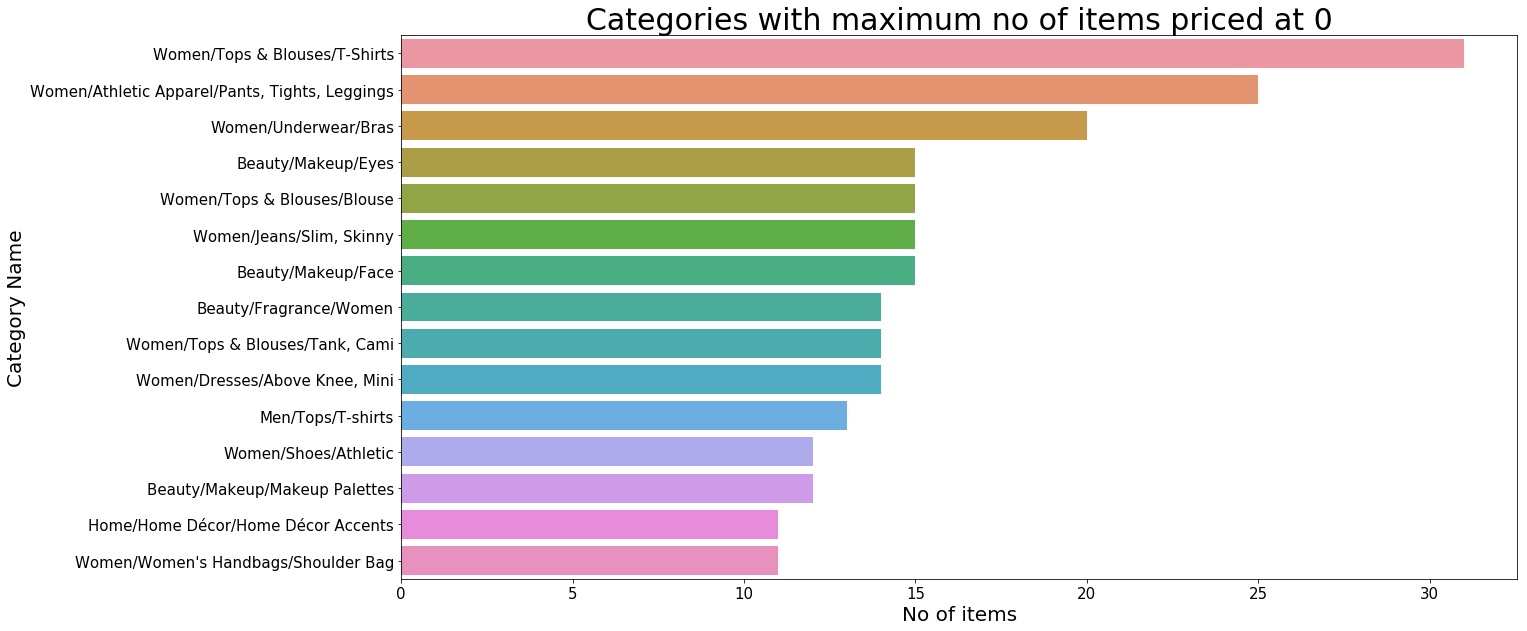

In [71]:
plt.subplots(figsize=(20,10))
sns.barplot(y=new_data.category_names,x=new_data.category_count)
plt.title('Categories with maximum no of items priced at 0',fontsize=30)
plt.xlabel('No of items',fontsize=20)
plt.ylabel('Category Name',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# shipping Fee Paying problem

Text(0, 0.5, 'Price without outliers')

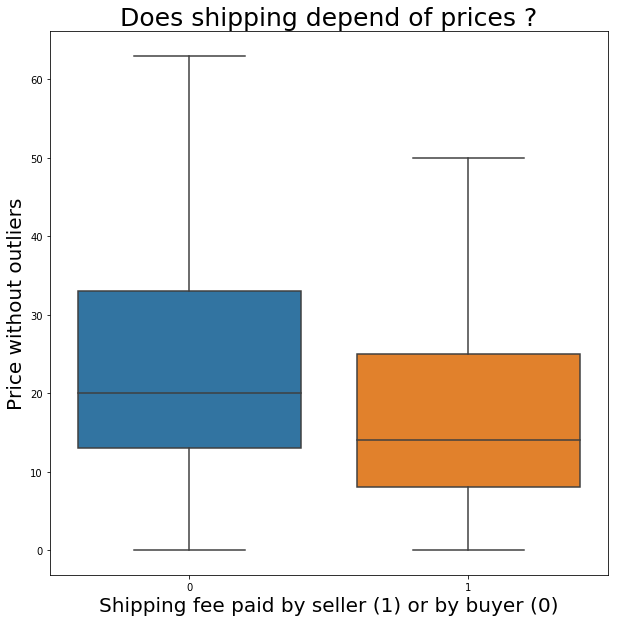

In [72]:
plt.subplots(figsize=(10,10))
sns.boxplot(x=my_data.shipping,y=my_data.price,showfliers=False)
plt.title('Does shipping depend of prices ?', fontsize = 25)
plt.xlabel('Shipping fee paid by seller (1) or by buyer (0)', fontsize = 20)
plt.ylabel('Price without outliers', fontsize = 20)

## KDE plot for description length

Text(0.5, 0, 'Description length')

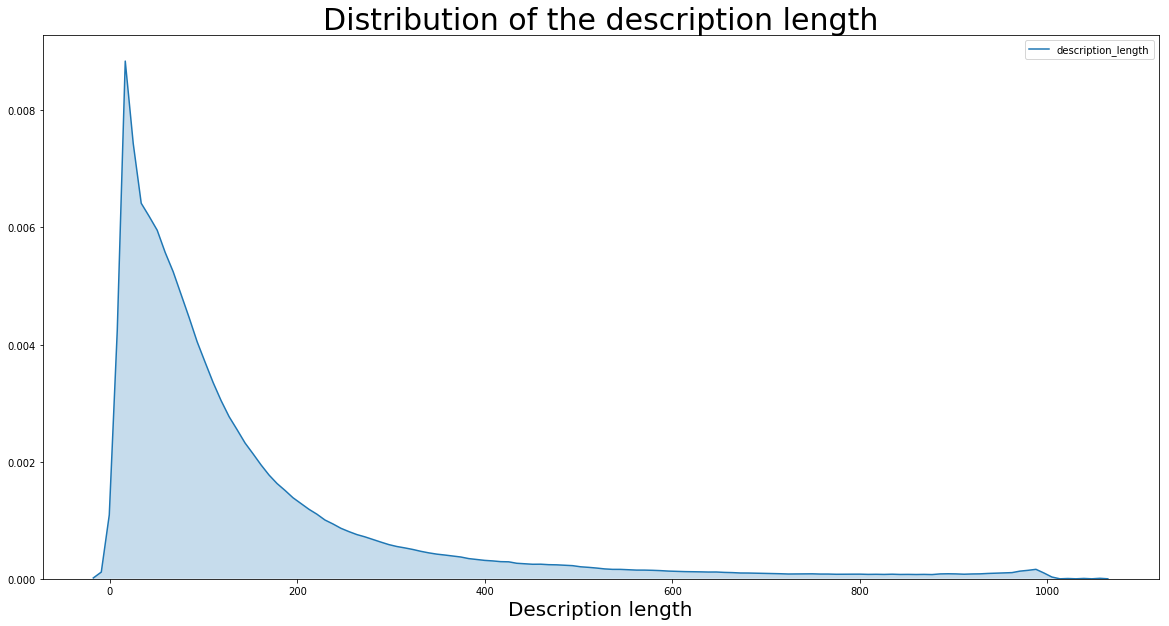

In [73]:
my_data['description_length']=my_data.item_description.str.len()
plt.subplots(figsize=(20,10))
sns.kdeplot(data=my_data['description_length'],shade=True)
plt.title('Distribution of the description length',fontsize=30)
plt.xlabel('Description length',fontsize=20)

# Regression plot 

Text(0, 0.5, 'Price')

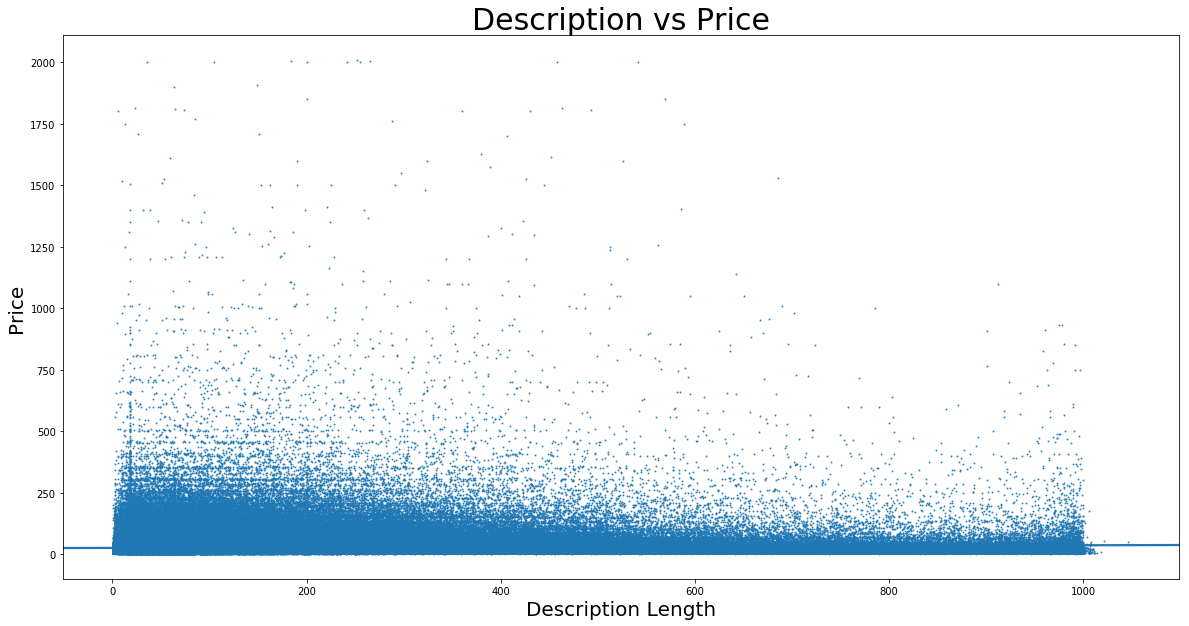

In [74]:
plt.subplots(figsize=(20,10))
sns.regplot(x=my_data.description_length,y=my_data.price,scatter_kws={'s':1})
plt.title('Description vs Price',fontsize=30)
plt.xlabel('Description Length',fontsize=20)
plt.ylabel('Price',fontsize=20)